In [1]:
import unyt
import swiftsimio as sw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
catalogue = sw.load("SOAP/L012_m6/halo_properties_0127.hdf5")
dir(catalogue)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bound_subhalo',
 'create_datasets',
 'exclusive_sphere_100kpc',
 'exclusive_sphere_10kpc',
 'exclusive_sphere_1kpc',
 'exclusive_sphere_30kpc',
 'exclusive_sphere_3kpc',
 'exclusive_sphere_50kpc',
 'filename',
 'get_metadata',
 'get_units',
 'inclusive_sphere_100kpc',
 'inclusive_sphere_10kpc',
 'inclusive_sphere_1kpc',
 'inclusive_sphere_30kpc',
 'inclusive_sphere_3kpc',
 'inclusive_sphere_50kpc',
 'input_halos',
 'input_halos_fof',
 'input_halos_hbtplus',
 'mask',
 'metadata',
 'projected_aperture_100kpc_projx',
 'projected_aperture_100kpc_projy',
 'projected_aperture_100kpc_projz',
 'projected_apertur

In [14]:
meta = catalogue.metadata
dir(meta)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'a',
 'bound_subhalo_properties',
 'boxsize',
 'code',
 'cosmology',
 'cosmology_raw',
 'dimension',
 'exclusive_sphere_100kpc_properties',
 'exclusive_sphere_10kpc_properties',
 'exclusive_sphere_1kpc_properties',
 'exclusive_sphere_30kpc_properties',
 'exclusive_sphere_3kpc_properties',
 'exclusive_sphere_50kpc_properties',
 'extract_cosmology',
 'filename',
 'gas_gamma',
 'get_metadata',
 'get_nice_name',
 'gravity_scheme',
 'handle',
 'header',
 'homogeneous_arrays',
 'hydro_scheme',
 'inclusive_sphere_100kpc_properties',
 'inclus

In [48]:
boxsize=meta.boxsize
z=meta.redshift
time = 13.8*unyt.Gyr #will need to work out how to calculate this based on redshift - is there an age parameter in the SOAP

In [3]:
dir(catalogue.bound_subhalo)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_angular_momentum_baryons',
 '_angular_momentum_dark_matter',
 '_angular_momentum_gas',
 '_angular_momentum_stars',
 '_averaged_star_formation_rate',
 '_black_holes_dynamical_mass',
 '_black_holes_last_event_scalefactor',
 '_black_holes_subgrid_mass',
 '_black_holes_total_injected_thermal_energy',
 '_centre_of_mass',
 '_centre_of_mass_velocity',
 '_dark_matter_inertia_tensor',
 '_dark_matter_mass',
 '_dark_matter_velocity_dispersion_matrix',
 '_disc_to_total_gas_mass_fraction',
 '_disc_to_total_stellar_mass_fraction',
 '_enclose_radius',
 '_gas_inertia_tensor',
 '_gas_mass',
 '_gas_mass_fraction_in_metal

In [80]:
COM = catalogue.bound_subhalo.centre_of_mass
Mstar = catalogue.bound_subhalo.stellar_mass
SFR = catalogue.bound_subhalo.star_formation_rate
kappa_corot = catalogue.bound_subhalo.kappa_corot_stars
disk_fraction = catalogue.bound_subhalo.disc_to_total_stellar_mass_fraction

In [18]:
starmask = Mstar > 0

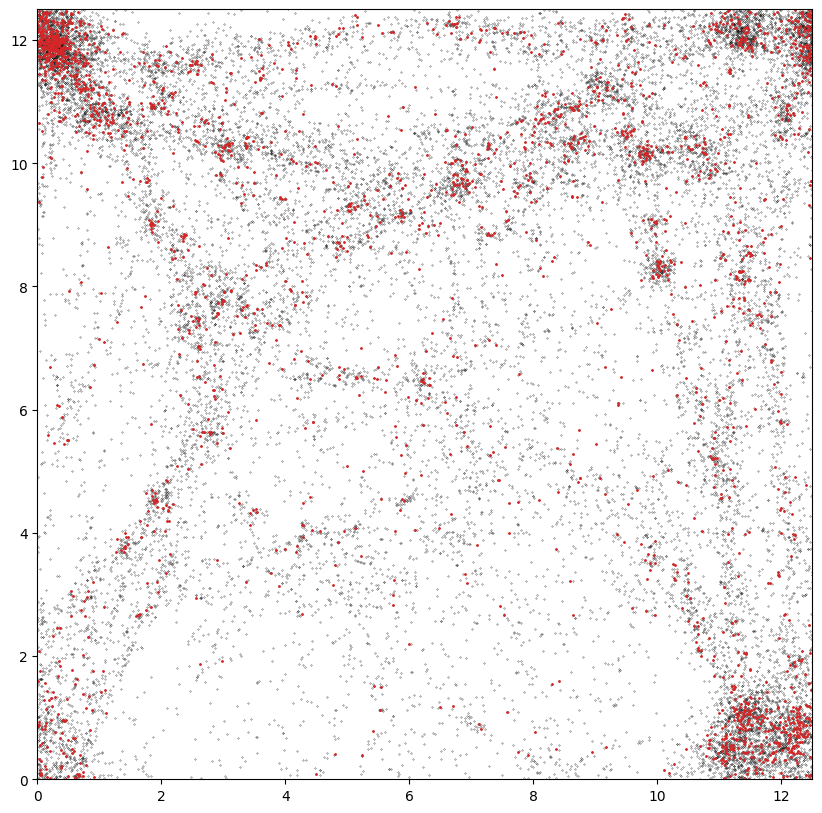

In [37]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(COM[:,0],COM[:,1],s=0.05,c='k') # all subhalos
ax.scatter(COM[starmask,0],COM[starmask,1],s=1,c='C3') # those containing some stellar mass
ax.set_xlim((0,boxsize[0]))
ax.set_ylim((0,boxsize[1]))

plt.show()

In [56]:
# based on Popesso+23, as described in Rizzo+24
SFMS_masses = np.logspace(8.5,11.5,100) * unyt.Msun
m = np.log10(SFMS_masses/unyt.Msun) + 0.025
t = time/unyt.Gyr
MSMZ = (-0.034*t+4.722)*m - 0.1925*m**2 + (0.2*t-26.16)
SFMS_SFRs = 10**MSMZ * (unyt.Msun/unyt.yr)

In [64]:
masscut = 10**10 * unyt.Msun
dMScut = -1

m = np.log10(Mstar/unyt.Msun) + 0.025
SFR_MS = 10**((-0.034*t+4.722)*m - 0.1925*m**2 + (0.2*t-26.16)) * (unyt.Msun/unyt.yr)
deltaMS = np.log10(SFR/SFR_MS)


selection = (Mstar>masscut) & (deltaMS>dMScut)

/Users/jamiemcgregor/anaconda3/envs/colibre_env/lib/python3.11/site-packages/unyt/array.py:1832: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
/Users/jamiemcgregor/anaconda3/envs/colibre_env/lib/python3.11/site-packages/unyt/array.py:1972: RuntimeWarning: divide by zero encountered in divide
  out_arr = func(
/Users/jamiemcgregor/anaconda3/envs/colibre_env/lib/python3.11/site-packages/unyt/array.py:1972: RuntimeWarning: invalid value encountered in divide
  out_arr = func(
/Users/jamiemcgregor/anaconda3/envs/colibre_env/lib/python3.11/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (1 at a=0.9999999999999997) for all arguments.
  warnings.warn(


In [66]:
Mstar

cosmo_array([0.        , 0.        , 0.        , ..., 0.        , 0.00010717,
       0.        ], dtype=float32, units='10000000000.0*Msun', comoving='False', cosmo_factor='1 at a=0.9999999999999997', valid_transform='True')

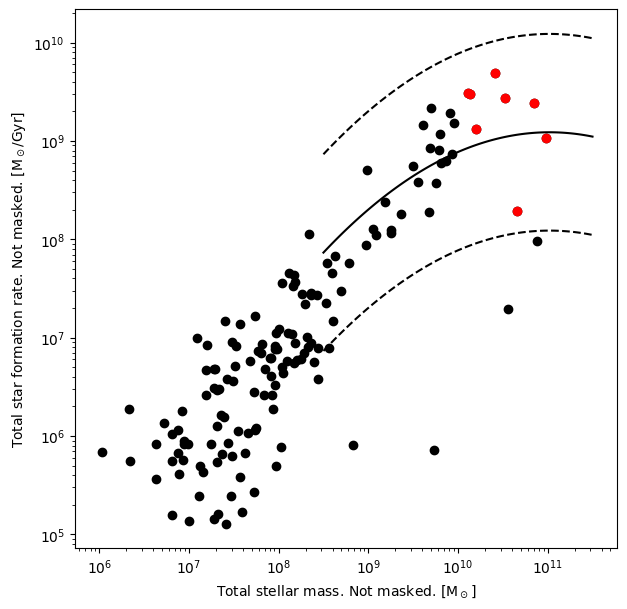

In [67]:
unyt.matplotlib_support.label_style = '[]'
with unyt.matplotlib_support:

    fig,ax = plt.subplots(figsize=(7,7))

    ax.scatter(Mstar,SFR, xunits='Msun',yunits='Msun/Gyr',c='k')
    ax.scatter(Mstar[selection],SFR[selection], xunits='Msun',yunits='Msun/Gyr',c='r')
    ax.plot(SFMS_masses,SFMS_SFRs,'k')
    ax.plot(SFMS_masses,SFMS_SFRs*10,'k--')
    ax.plot(SFMS_masses,SFMS_SFRs*0.1,'k--')
    ax.set_xscale('log')
    #ax.set_xlabel('Mstar [Msun]')
    ax.set_yscale('log')

    plt.show()

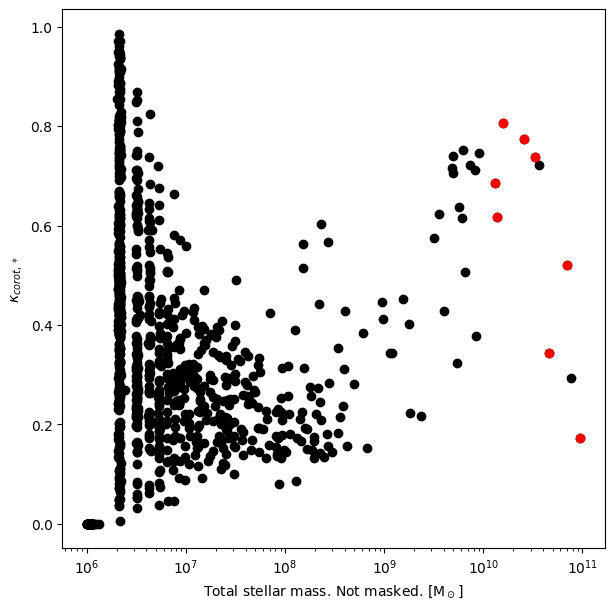

In [79]:
with unyt.matplotlib_support:

    fig,ax = plt.subplots(figsize=(7,7))

    ax.scatter(Mstar,kappa_corot, xunits='Msun',c='k')
    ax.scatter(Mstar[selection],kappa_corot[selection], xunits='Msun',c='r')
    ax.set_xscale('log')
    ax.set_ylabel(r'$\kappa_{corot,*}$')

    plt.show()

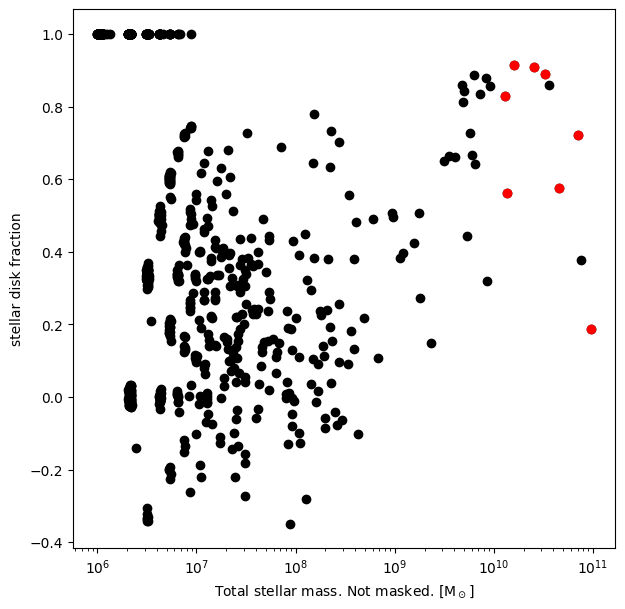

In [82]:
with unyt.matplotlib_support:

    fig,ax = plt.subplots(figsize=(7,7))

    ax.scatter(Mstar,disk_fraction, xunits='Msun',c='k')
    ax.scatter(Mstar[selection],disk_fraction[selection], xunits='Msun',c='r')
    ax.set_xscale('log')
    ax.set_ylabel('stellar disk fraction')

    plt.show()

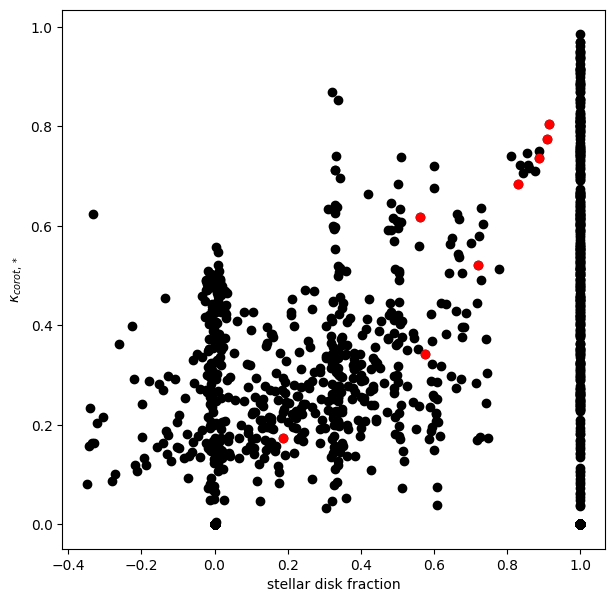

In [84]:
with unyt.matplotlib_support:

    fig,ax = plt.subplots(figsize=(7,7))

    ax.scatter(disk_fraction, kappa_corot,c='k')
    ax.scatter(disk_fraction[selection], kappa_corot[selection], c='r')
    ax.set_xlabel('stellar disk fraction')
    ax.set_ylabel(r'$\kappa_{corot,*}$')

    plt.show()